In [13]:
import networkx as nx

In [1]:
from network import *
%matplotlib inline

In [2]:
# pip3 install python-louvain
import community

In [3]:
coauthorNetwork = CoauthorNetwork.load_with_loader("./data/out_test.txt", parse_dataset_file);


Uniq authors: 42619


In [4]:
coauthorNetwork.gen_components()
coauthorNetwork.analize_component()

In [5]:
coauthorNetwork.component_subgraph

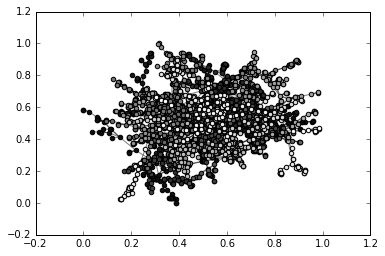

In [19]:
G = coauthorNetwork.component_subgraph
partition = community.best_partition(G)

#drawing
size = float(len(set(partition.values())))
pos = nx.spring_layout(G)
count = 0.
for com in set(partition.values()) :
    count = count + 1.
    list_nodes = [nodes for nodes in partition.keys()
                                if partition[nodes] == com]
    nx.draw_networkx_nodes(G, pos, list_nodes, node_size = 20,
                                node_color = str(count / size))


nx.draw_networkx_edges(G,pos, alpha=0.5)
plt.show()

In [10]:
partition_count = max(partition.values())

50

In [15]:
top_authors = {}
for author, cluster in partition.items():
    max_for_partition = top_authors.get(cluster, ("", 0) )
    author_degree = len(nx.neighbors(coauthorNetwork.component_subgraph, author))
    if max_for_partition[1] < author_degree:
        top_authors[cluster] = (author, author_degree)

In [18]:
# Top authors for each community by co-authorship
top_authors

{0: ('Alessandro Garcia', 12),
 1: ('Peter Lendermann', 24),
 2: ('Jun Wang', 25),
 3: ('Don Towsley', 24),
 4: ('Moti Yung', 14),
 5: ('Li Li', 22),
 6: ('Xiaohua Hu', 13),
 7: ('Makoto Takizawa', 17),
 8: ('Wei Li', 18),
 9: ('Yi Yang', 15),
 10: ('Jie Yang', 26),
 11: ('Yong He', 12),
 12: ('Sumit Roy', 14),
 13: ('Hai Jin', 20),
 14: ('Andreas Koschan', 11),
 15: ('Christoph Bussler', 20),
 16: ('Li Zhang', 14),
 17: ('Philip S. Yu', 14),
 18: ('Evelyne Lutton', 14),
 19: ('Ajith Abraham', 14),
 20: ('Jing Wang', 19),
 21: ('Katsumi Tanaka', 26),
 22: ('Dieter Gollmann', 14),
 23: ('Ramez Elmasri', 14),
 24: ('Tao Li', 15),
 25: ('Colin Tattersall', 19),
 26: ('Hsinchun Chen', 22),
 27: ('Koen De Bosschere', 11),
 28: ('Johannes Gehrke', 17),
 29: ('Wei Wang', 27),
 30: ('Qing Li', 19),
 31: ('David Goldsman', 19),
 32: ('Kazuya Takeda', 19),
 33: ('Ying Liu', 14),
 34: ('Jane Hunter', 7),
 35: ('Wolfgang Nejdl', 19),
 36: ('Myra Spiliopoulou', 28),
 37: ('Nicholas R. Jennings', 10